In [1]:
# 使用pandas读入.csv
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('../data/watermelon_3.csv', encoding='gbk')


# 使用seaborn进行数据可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

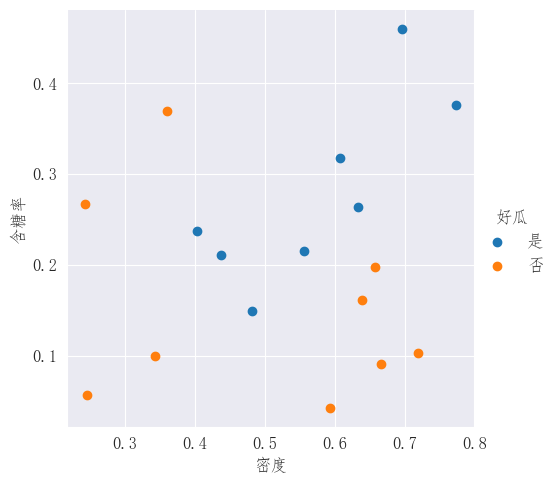

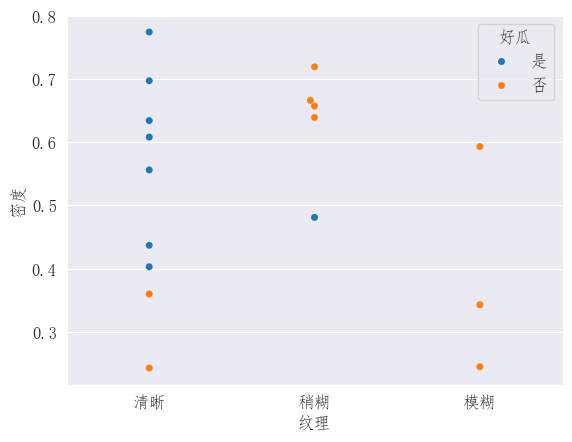

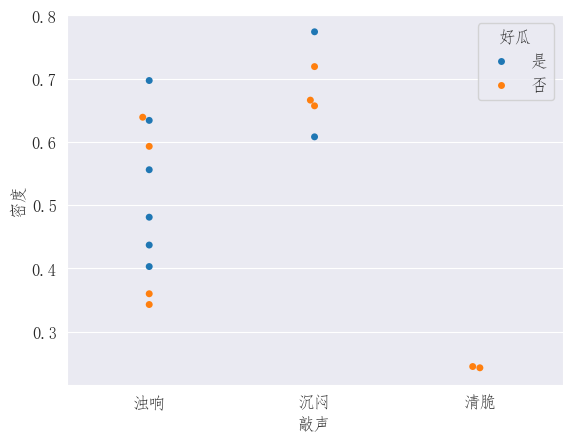

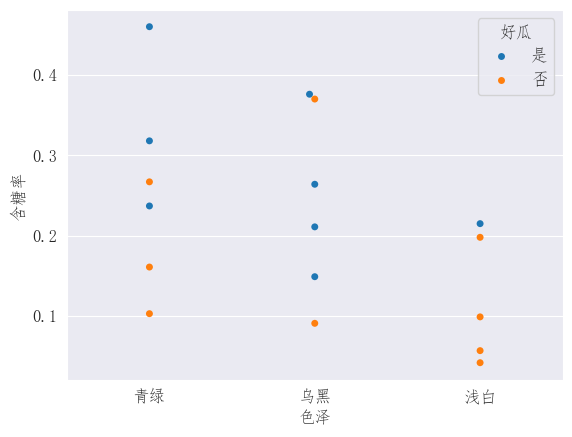

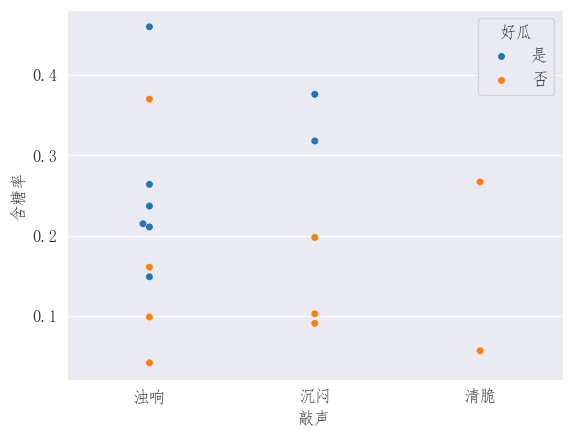

In [2]:
# 使用中文字体
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 采用仿宋字体
mpl.rcParams['axes.unicode_minus'] = False 
mpl.rcParams['font.size'] = 12
 
sns.FacetGrid(df, hue="好瓜", height=5).map(plt.scatter, "密度", "含糖率").add_legend() 
plt.show()
 
sns.swarmplot(x = "纹理", y = '密度', hue = "好瓜", data = df)
plt.show()

sns.swarmplot(x = "敲声", y = '密度', hue = "好瓜", data = df)
plt.show()

sns.swarmplot(x = "色泽", y = '含糖率', hue = "好瓜", data = df)
plt.show()

sns.swarmplot(x = "敲声", y = '含糖率', hue = "好瓜", data = df)
plt.show()    

In [3]:
# 将类别变为数字
df.loc[df['好瓜']!= '是','好瓜'] = 0
df.loc[df['好瓜']== '是','好瓜'] = 1
df['好瓜'] = df['好瓜'].astype('int')

# 取出X和y
X = pd.get_dummies(df.iloc[:,1:-1]).values
y = df.iloc[:,-1].values

# 切割数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=125)

In [4]:
# 建模并预测
BPNet = MLPClassifier(random_state=123)
BPNet.fit(X_train,y_train)
y_pred = BPNet.predict(X_test)
print(y_test,y_pred)

# 输出预测结果报告
print('预测报告为：\n',classification_report(y_test,y_pred))

[0 1 0 1] [0 1 0 1]
预测报告为：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



D:\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
